In [1]:
# Example 2: learning about the K-Means algorithm (clustering)
# Dataset: https://www.kaggle.com/shwetabh123/mall-customers
# Author: Humberto Bianchini

In [2]:
# 1) Importing all necessary libraries.

In [3]:
import pandas as pd
import numpy as np
# import seaborn as sb
# import ploty as pt
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:
# 2) Reading and showing the first rows of the dataset.

In [5]:
mall_customers = pd.read_csv('datasets/Mall_Customers.csv')
mall_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# 3) Some basic information about the size of dataframe.

In [7]:
mall_customers.shape  # Number of (Rows, Columns)

(200, 5)

In [8]:
mall_customers.describe()  # Description of dataframe

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# 3) Using Pandas Profiling to generate a HTML file report.

In [10]:
profile = ProfileReport(mall_customers, title='Mall Customers - Report', html={'style':{'full_width':True}})
#profile.to_file(output_file='Mall Customers - Report.html')

In [11]:
# 4) Plotting a different style graph: 'Annual Income' x 'Spending Score'.

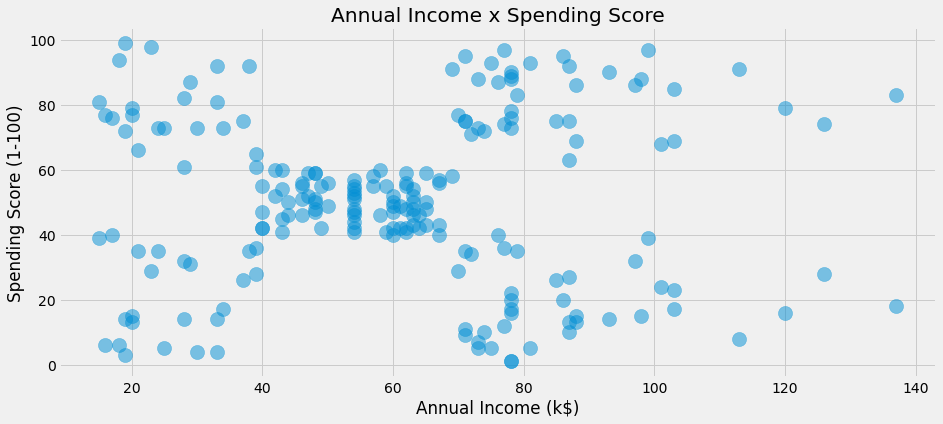

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[14, 6])
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=mall_customers, s=200, alpha=0.5)
plt.title("Annual Income x Spending Score")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [13]:
# 5) Determining the optimal number of clusters (midle of graphics curve) using the "Elbow Method" for the example

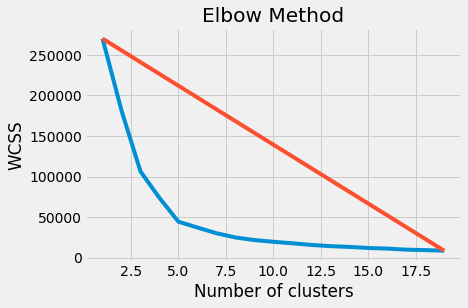

In [14]:
x2 = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 20), wcss)
plt.plot([1, 19], [wcss[0], wcss[len(wcss)-1]])
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
# 6) Plotting the graph with the centroids (5).

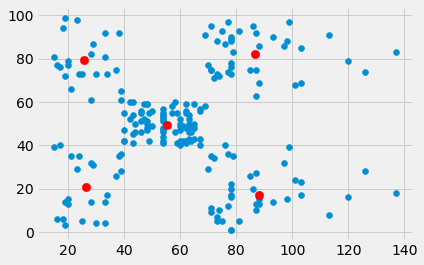

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(x2)

plt.scatter(x2[:,0], x2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()